# Projet d'Analyse de Données

Ce notebook va traiter l'analyse d'un jeu de données en utilisant la méthode de clustering vue en cours.

# Partie Clustering

Cette première partie du projet utilise les données d'analyse chimiques de vins disponibles sur le site UCI au lien : http://archive.ics.uci.edu/ml/datasets/wine
La première cellule se charge de télécharger les données concernées et peut être décommentée au besoin.

### **Ensemble** **de données**

### a) Cultivar
### b) Alcohol
### c) Malic acid
### d) Ash
### e) Alcalinity of ash
### f) Magnesium
### g) Total phenols
### h) Flavanoids
### i) Nonflavanoid phenols
### j) Proanthocyanins
### k) Color intensity
### l) Hue
### m) OD280/OD315 of diluted wines
### n) Proline

#### Je commence d'abord par effectuer l'import de l'ensemble des modules nécessaires à la réalisation du projet.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
%matplotlib inline

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

## Lire les données

Nous choisissons de stocker nos données dans une DataFrame, du package pandas (https://pandas.pydata.org/), pour les manipuler facilement.


Il existe plusieurs méthodes pour analyser rapidement le contenu d'une DataFrame. `df.head(), df.tail(), df.describe()`, et df.info() en sont des examples. Les paramètres peuvent être modifiés selon les informations que l'on souhaite afficher -> dans notre cas on utilise le df.describe()


#### Ceci prendra effet sur les attributs numériques. Les variables catégoriques ne seront pas inclus.

In [8]:
df = pd.read_csv('wine.data', header=0, sep=',')
df.describe()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


On a pas de données catégoriques

In [9]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       178 non-null    int64  
 1   b       178 non-null    float64
 2   c       178 non-null    float64
 3   d       178 non-null    float64
 4   e       178 non-null    float64
 5   f       178 non-null    int64  
 6   g       178 non-null    float64
 7   h       178 non-null    float64
 8   i       178 non-null    float64
 9   j       178 non-null    float64
 10  k       178 non-null    float64
 11  l       178 non-null    float64
 12  m       178 non-null    float64
 13  n       178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [10]:
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### Le fichier choisis contient 178 individus représentés par une variable qualitative (a) et 13 variables quantitatives (b, c, ..., n)
#### les variables quantitatives sont de type float mise à part f et n qui sont de type integer
#### On voit aussi qu'il n'y a pas de valeurs manquantes, donc la préparation de données en remplaçant les valeurs manquantes par la médiane est inutile.
#### Tous les attributs sont continus

## Data Preparation : on va préparer les données pour pouvoir appliquer l'analyses par la suite.


Séparer l'**étiquette** du reste des attributs

In [11]:
# Separate 
data_tr = df.drop("a", axis =1)
print(data_tr)

         b     c     d     e    f     g     h     i     j      k     l     m  \
0    14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04  3.92   
1    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
2    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
3    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
4    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
173  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
174  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
175  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
176  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
177  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

        n  
0    1065  
1    1050  
2  

Les informations importantes que l'on peut noter sont:
* Nos données sont composées de 178 individus (lignes) et 13 attributs (colonnes). 

Lorsque l'on souhaite remplacer des valeurs manquantes (NaN) par des valeurs artificielles, on fait ce que l'on appelle de l'**imputation**. Pour cela, on utilise la méthode SimpleImputer du package sklearn (scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html). Il existe différentes stratégies pour l'imputation.
Pas besoin de factoriser car les données sont déja numériques

Une fois les données traitées, nous pouvons passer au clustering (K-means et clustering hiérarchique):

Dans l'analyse suivante, nous faisons varier le nombre de centres pour l'algorithme des K-Means, afin de trouver le meilleur nombre de clusters

For n_clusters = 2 The average silhouette_score is : 0.6568490946514269
For n_clusters = 3 The average silhouette_score is : 0.5711220218931753
For n_clusters = 4 The average silhouette_score is : 0.562013637082329
For n_clusters = 5 The average silhouette_score is : 0.548969124044004
For n_clusters = 6 The average silhouette_score is : 0.5638439319582822
For n_clusters = 7 The average silhouette_score is : 0.5615815711618601
For n_clusters = 8 The average silhouette_score is : 0.539834115772479
For n_clusters = 9 The average silhouette_score is : 0.5315778393575367


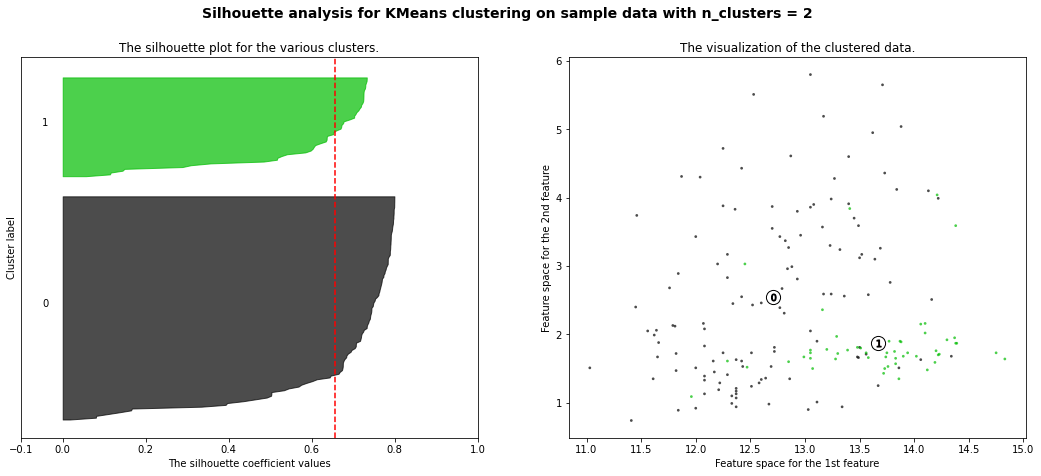

<Figure size 1080x792 with 0 Axes>

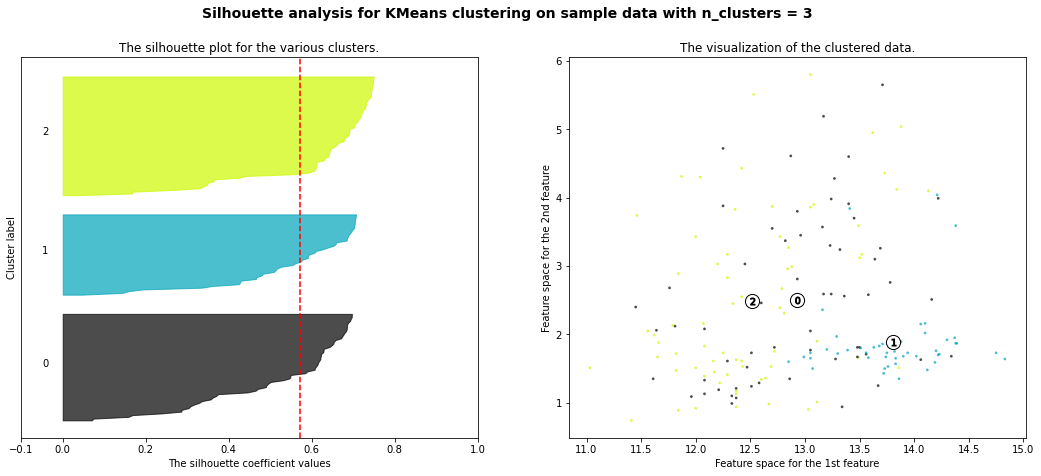

<Figure size 1080x792 with 0 Axes>

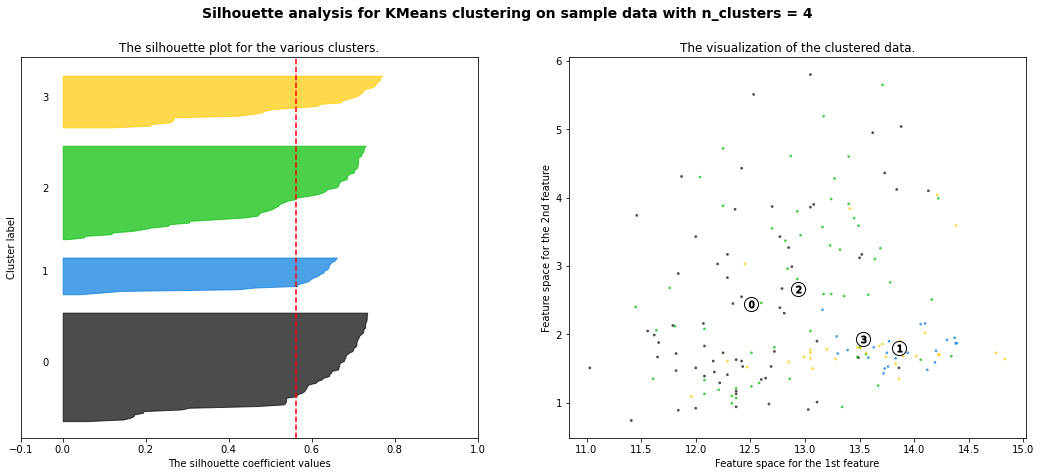

<Figure size 1080x792 with 0 Axes>

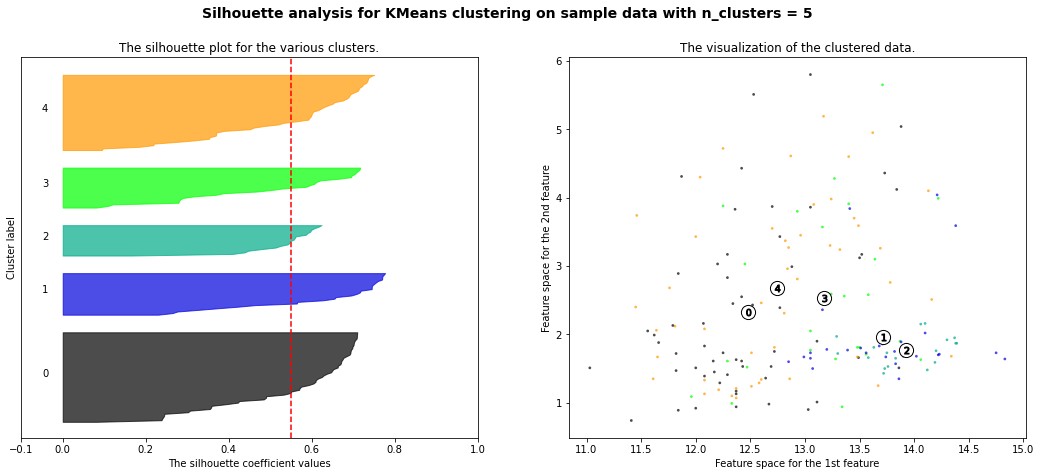

<Figure size 1080x792 with 0 Axes>

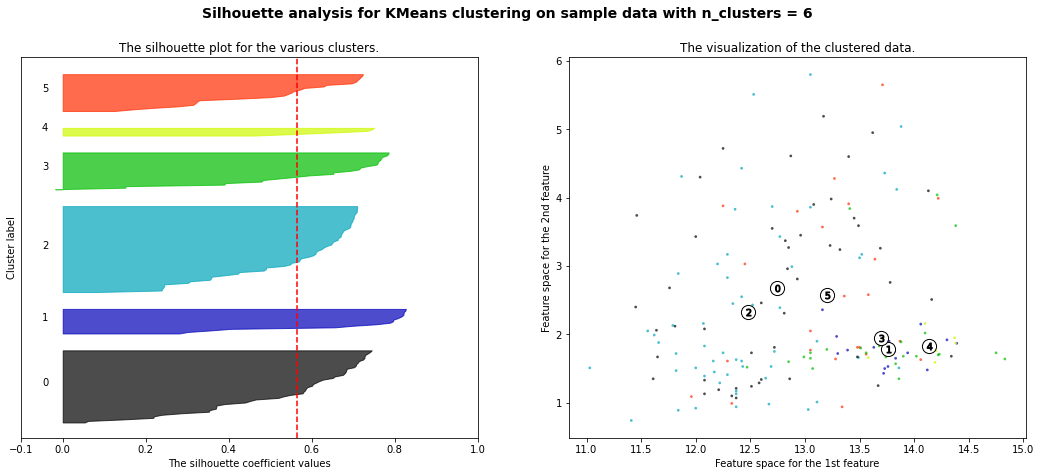

<Figure size 1080x792 with 0 Axes>

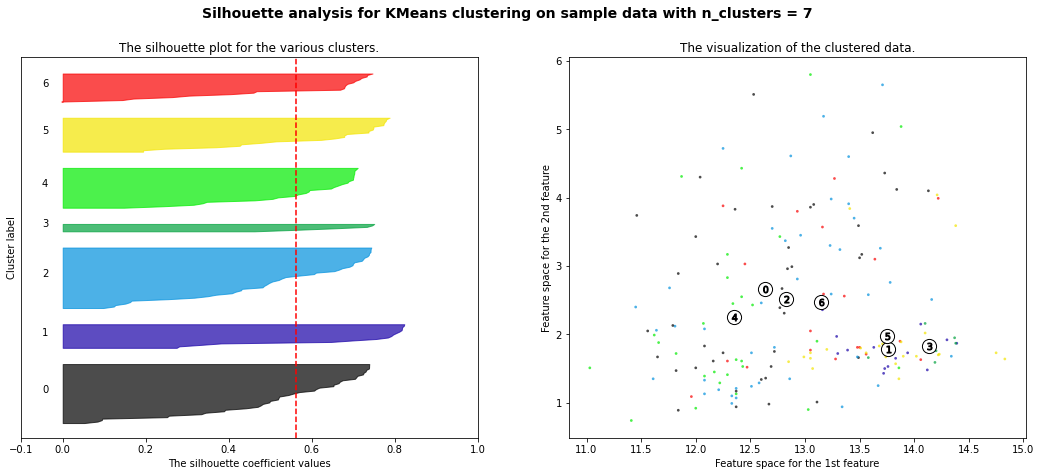

<Figure size 1080x792 with 0 Axes>

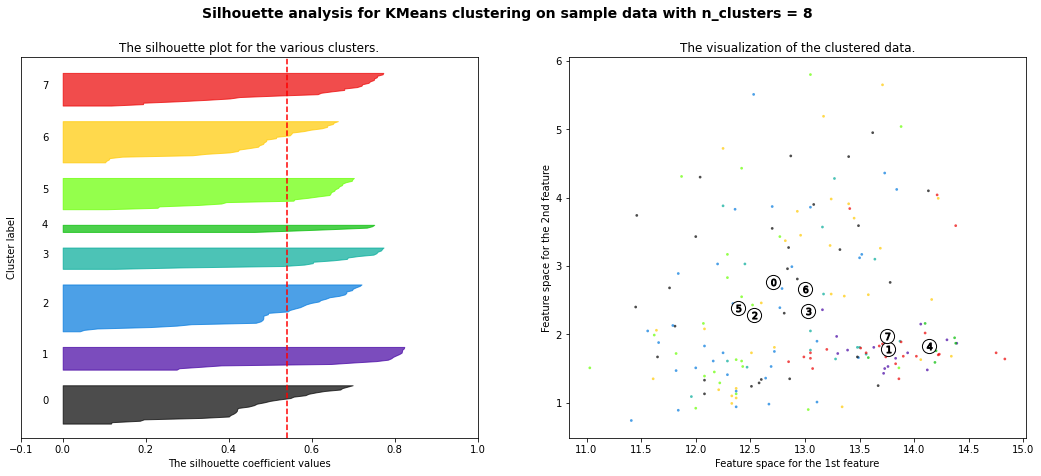

<Figure size 1080x792 with 0 Axes>

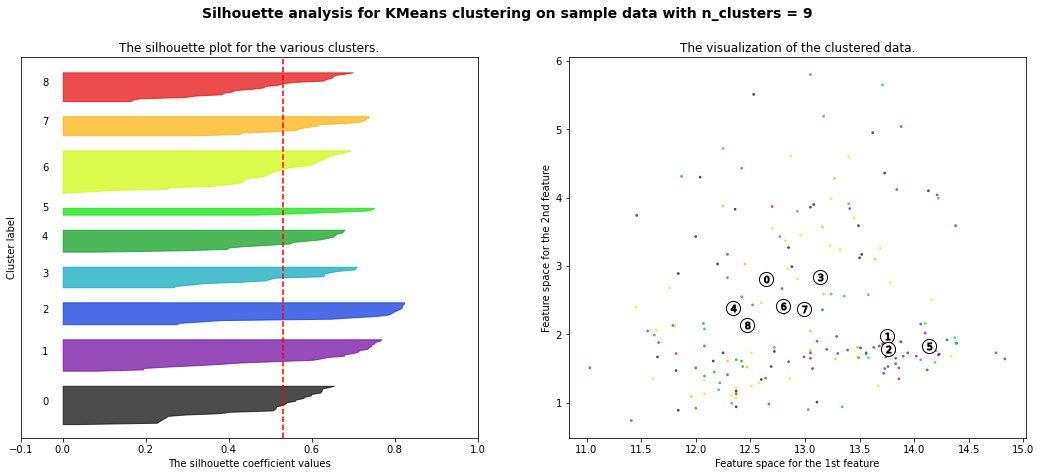

<Figure size 1080x792 with 0 Axes>

<Figure size 1080x792 with 0 Axes>

In [20]:
X = data_tr.to_numpy()
# Use the silhouette function to find the number of clusters fo both k-means and hierarchical clustering
range_n_clusters = range(2,10)

# Kmeans

# Import KMeans from SciKit Learn
from sklearn.cluster import KMeans
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
  # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_tr) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data_tr)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_tr, cluster_labels)

    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(data_tr, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 

    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    

plt.show()

## K Means Cluster Creation

L'analyse précédente nous a permis de choisir le nombre de centres à utiliser pour l'analyse. Nous allons donc maintenant entrainer un modèle K-Means avec deux centres, et comparer ses prédicitons à la réalité. Cela permet d'évaluer la qualité de la prédiction.

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_tr)

KMeans(n_clusters=3)

In [14]:
kmeans.cluster_centers_

array([[1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [40]:
labels = df["a"]
def converter(cluster):
    if cluster == 1:
        return 0
    elif cluster == 2:
        return 1
    else:
        return 2
    
data_tr['Cluster'] = labels.apply(converter)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

#K Means
print("Kmeans results:")
print(confusion_matrix(data_tr['Cluster'],kmeans.labels_))
print(classification_report(data_tr['Cluster'],kmeans.labels_))

Kmeans results:
[[46  0 13]
 [ 1 50 20]
 [ 0 19 29]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87        59
           1       0.72      0.70      0.71        71
           2       0.47      0.60      0.53        48

    accuracy                           0.70       178
   macro avg       0.72      0.70      0.70       178
weighted avg       0.74      0.70      0.71       178



## La visualisation des clusters sur le plan obtenu par l'ACP et la suite des questions de la partie "Clustering" est à la fin du fichier "ACP_Projet"